# In-Game_Purchase_Analysis

![Video Game Image](images/Fantasy.jpg)

Many online games are free-to-play, but allow for in-game purchases of special abilities or items. Here, a mock dataset of in-game purchases and user profiles can be found in the input_data folder of this repo. In order to tailor marketing efforts and to optimize the game for revenue generation, this dataset of in-game purchases and corresponding user demographics is analyzed below to uncover trends.
## Goals:
Data will be analyzed using PANDAS and matplotlib to generate a report.
### Important Metrics to Calculate:
#### Player Count

 - Total Number of Players


#### Purchasing Analysis (Total)


 - Number of Unique Items
 - Average Purchase Price
 - Total Number of Purchases
 - Total Revenue


#### Gender Demographics


 - Percentage and Count of Male Players
 - Percentage and Count of Female Players
 - Percentage and Count of Other / Non-Disclosed


#### Purchasing Analysis (Gender) 


The below each broken by gender


 - Purchase Count
 - Average Purchase Price
 - Total Purchase Value
 - Normalized Totals




#### Age Demographics


The below each broken into bins of 4 years (i.e. <10, 10-14, 15-19, etc.) 


 - Purchase Count
 - Average Purchase Price
 - Total Purchase Value
 - Normalized Totals




#### Top Spenders


Identify the the top 5 spenders in the game by total purchase value, then list (in a table):


 - SN
 - Purchase Count
 - Average Purchase Price
 - Total Purchase Value




#### Most Popular Items


Identify the 5 most popular items by purchase count, then list (in a table):


 - Item ID
 - Item Name
 - Purchase Count
 - Item Price
 - Total Purchase Value




#### Most Profitable Items


Identify the 5 most profitable items by total purchase value, then list (in a table):


 - Item ID
 - Item Name
 - Purchase Count
 - Item Price
 - Total Purchase Value

### We will also:

 - Ensure the script works for multiple datasets
 - Include an exported markdown version of the notebook, called README.md in the repo
 - Include a written description of three observable trends based on the data

# Analysis

## Exploration

### Import dependencies:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load .json files into pandas DataFrames

In [2]:
json1 = pd.read_json('inputfiles/purchase_data.json')
json2 = pd.read_json('inputfiles/purchase_data2.json')
df1 = pd.DataFrame(json1)
df2 = pd.DataFrame(json2)

### Explore data

In [3]:
df1.head()


,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


In [4]:
df1.dtypes

Age            int64
Gender        object
Item ID        int64
Item Name     object
Price        float64
SN            object
dtype: object

In [5]:
df2.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,20,Male,93,Apocalyptic Battlescythe,4.49,Iloni35
1,21,Male,12,Dawne,3.36,Aidaira26
2,17,Male,5,Putrid Fan,2.63,Irim47
3,17,Male,123,Twilight's Carver,2.55,Irith83
4,22,Male,154,Feral Katana,4.11,Philodil43


In [6]:
df2.dtypes

Age            int64
Gender        object
Item ID        int64
Item Name     object
Price        float64
SN            object
dtype: object

## Concatenate datasets
### Why:

- Datasets have the same column names
- Rows are not in any particular order
- Datatypes for each column are identical across the two datasets
- No information to differentiate the two, such as year or location
- Want to have more accurate analysis, with larger sample

In [7]:
frames = [df1, df2]

In [8]:
alldata = pd.concat(frames)
alldata.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


## Player Count:

In [9]:
alldata.SN.nunique()

612

#### Or as a data frame:

In [10]:
playercount = pd.DataFrame({'Total Players': alldata.SN.nunique()}, index=[0])
playercount

,Total Players
0,612


## Purchasing Analysis (Total)

In [11]:
purchasing_analysis = pd.DataFrame({'Number of Unique Items': alldata['Item ID'].nunique(),
                                   'Average Purchase Price': alldata['Price'].mean(),
                                   'Total Number of Purchases': len(alldata.index),
                                   'Total Revenue': alldata['Price'].sum()},
                                   index=[0])

purchasing_analysis = purchasing_analysis.style.format({'Average Purchase Price': '${:,.2f}',
                                                        'Total Revenue': '${:,.2f}'})

purchasing_analysis

,Average Purchase Price,Number of Unique Items,Total Number of Purchases,Total Revenue
0,$2.93,184,858,"$2,514.43"


## Gender Demographics

In [12]:
gender_grouped = alldata.groupby('Gender')

In [13]:
# function creates two dataframes showing the count of each gender, plots one, 
# and adds percentage column to the other for table display
def count_and_proportion(groupbyobj):
    
    plottable = pd.DataFrame(groupbyobj.Gender.count())
    analysis = pd.DataFrame(groupbyobj.Gender.count())
    
    analysis['Percentage'] = analysis['Gender'] / analysis['Gender'].sum() * 100

    analysis_renamed = analysis.rename(columns={'Gender':'Frequency'})

    analysis_formatted = analysis_renamed.style.format({'Percentage': '{:.2f}%'})
    
    plt.clf()
    
    plottable.plot(kind='bar', facecolor='red', legend=False, rot=0)
    
    plt.show()
    
    return analysis_formatted

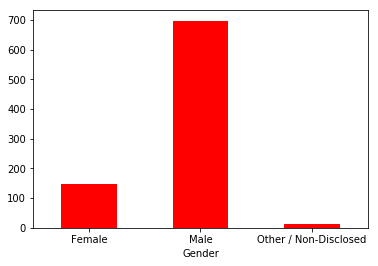

,Frequency,Percentage
Gender,,
Female,149,17.37%
Male,697,81.24%
Other / Non-Disclosed,12,1.40%


In [14]:
count_and_proportion(gender_grouped)

## Purchasing Analysis (Gender)
The below each broken by gender
 - Purchase Count
 - Average Purchase Price
 - Total Purchase Value
 - Normalized Totals

In [15]:
gender_group = alldata.groupby('Gender')

In [16]:
# Define function to return this summary type
def purchase_summary(groupbyobj):
    # Generate dataframe of summaries

    results = pd.DataFrame({'Purchase Count': groupbyobj.Price.count(),
                               'Average Purchase Price': groupbyobj.Price.mean(),
                               'Total Purchase Value': groupbyobj.Price.sum()})

    # Add calculated column

    results['Normalized Totals'] = results['Total Purchase Value'] / results['Purchase Count']
    
    return results

In [17]:
def format_summary(results):
    # Format results
    results = results.style.format({'Average Purchase Price': '${:.2f}',
                                    'Total Purchase Value': '${:.2f}',
                                    'Normalized Totals': '${:.2f}'})
    return results

In [18]:
raw = purchase_summary(gender_group)
format_summary(raw)

,Average Purchase Price,Purchase Count,Total Purchase Value,Normalized Totals
Gender,,,,
Female,$2.85,149,$424.29,$2.85
Male,$2.94,697,$2052.28,$2.94
Other / Non-Disclosed,$3.15,12,$37.86,$3.15


## Age Demographics

### Explore Ages

In [19]:
alldata.Age.min()

7

In [20]:
alldata.Age.max()

45

### Bin Players By Age Group

In [21]:
# Establish bins and labels

bins = [0, 9, 14, 19, 24, 29, 34, 39, 200]
labels = ['<10',
          '10-14',
          '15-19',
          '20-24',
          '25-29',
          '30-34',
          '35-39',
          '40+']

# Cut age into bins and create new column with bin group

alldata['Age Group'] = pd.cut(alldata['Age'], bins, labels=labels)

### Group players by age group to summarize

In [22]:
# Group data by age group to prepare for summary
age_groupby = alldata.groupby('Age Group')

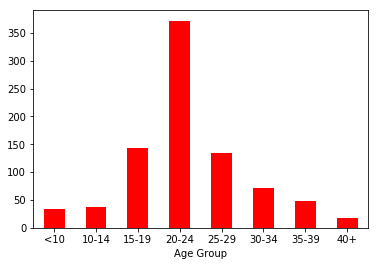

,Frequency,Percentage
Age Group,,
<10,33,3.85%
10-14,38,4.43%
15-19,144,16.78%
20-24,372,43.36%
25-29,134,15.62%
30-34,71,8.28%
35-39,48,5.59%
40+,18,2.10%


In [23]:
count_and_proportion(age_groupby)

In [24]:
raw = purchase_summary(age_groupby)
format_summary(raw)

,Average Purchase Price,Purchase Count,Total Purchase Value,Normalized Totals
Age Group,,,,
<10,$2.95,33,$97.28,$2.95
10-14,$2.79,38,$105.91,$2.79
15-19,$2.89,144,$416.83,$2.89
20-24,$2.92,372,$1087.66,$2.92
25-29,$2.96,134,$396.44,$2.96
30-34,$2.97,71,$211.14,$2.97
35-39,$2.93,48,$140.77,$2.93
40+,$3.24,18,$58.40,$3.24


## Top Spenders

Identify the the top 5 spenders in the game by total purchase value, then list (in a table):
 - SN
 - Purchase Count
 - Average Purchase Price
 - Total Purchase Value 

In [25]:
# Group data by screenname
sn_group = alldata.groupby('SN')

In [26]:
# Total purchases by screenname
purchase_totals = sn_group.Price.sum()

In [27]:
# Cast result as dataframe
purchase_totals_df = pd.DataFrame(purchase_totals)

In [28]:
# Rename totalled column
purchase_totals_df = purchase_totals_df.reset_index()
purchase_totals_df = purchase_totals_df.rename(columns={'Price':'User Purchase Total'})

In [29]:
# Merge results to original dataframe
alldata = alldata.merge(purchase_totals_df, on='SN', how='outer')

In [30]:
alldata.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age Group,User Purchase Total
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,35-39,5.06
1,38,Male,172,Blade of the Grave,1.69,Aelalis34,35-39,5.06
2,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46,20-24,2.32
3,34,Male,174,Primitive Blade,2.46,Assastnya25,30-34,4.75
4,34,Male,106,Crying Steel Sickle,2.29,Assastnya25,30-34,4.75


In [31]:
# Sort merged results, highest spender will be on top
sorted = alldata.sort_values(by='User Purchase Total', ascending=False)
sorted.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age Group,User Purchase Total
132,29,Male,144,Blood Infused Guardian,2.86,Undirrala66,25-29,17.06
135,29,Male,18,"Torchlight, Bond of Storms",1.77,Undirrala66,25-29,17.06
134,29,Male,62,Piece Maker,4.36,Undirrala66,25-29,17.06
133,29,Male,115,Spectral Diamond Doomblade,4.25,Undirrala66,25-29,17.06
136,29,Male,133,Faith's Scimitar,3.82,Undirrala66,25-29,17.06


In [32]:
# Find sum of dollars spent by each player, convert this series to dataframe

dollars_spent = pd.DataFrame(sn_group.Price.sum())

# Sort the dataframe by money spent

by_spent = dollars_spent.sort_values(by='Price', ascending=False)

# Take the top 5 and rename column

top_spenders = by_spent.head(5)
top_spenders = top_spenders.rename(columns={'Price':'Purchase Total'})
top_spenders = top_spenders.reset_index()

In [33]:
SNlist = top_spenders.SN.unique()
SNlist
# return dataframe with only these users for summary

top_spender_frame = alldata[(alldata['SN'] == SNlist[0])|
                            (alldata['SN'] == SNlist[1])|
                            (alldata['SN'] == SNlist[2])|
                            (alldata['SN'] == SNlist[3])|
                            (alldata['SN'] == SNlist[4])]


In [34]:
small_group = top_spender_frame.groupby('SN')

In [35]:
raw = purchase_summary(small_group)
now_sorted = raw.sort_values(by='Total Purchase Value', ascending=False)
format_summary(now_sorted)

,Average Purchase Price,Purchase Count,Total Purchase Value,Normalized Totals
SN,,,,
Undirrala66,$3.41,5,$17.06,$3.41
Aerithllora36,$3.77,4,$15.10,$3.77
Saedue76,$3.39,4,$13.56,$3.39
Sondim43,$3.25,4,$13.02,$3.25
Mindimnya67,$3.18,4,$12.74,$3.18


## Most Popular Items

Identify the 5 most popular items by purchase count, then list (in a table):
 - Item ID
 - Item Name
 - Purchase Count
 - Item Price
 - Total Purchase Value

In [36]:
itemgroup = alldata.groupby('Item ID')

In [37]:
# Age column was chosen to be basis of count, could have been any column
itempopframe = pd.DataFrame(itemgroup.Age.count())

In [38]:
# Rename count column to reflect intended calculation
itempopframe = itempopframe.rename(columns={'Age':'Item Total Uses'})

In [39]:
itempopframe = itempopframe.reset_index()

In [40]:
itempopframe = itempopframe.sort_values(by='Item Total Uses', ascending=False)

In [41]:
itempopframe.head()

,Item ID,Item Total Uses
84,84,12
39,39,11
31,31,10
44,44,9
154,154,9


In [42]:
# extract list of unique item IDs for filtering original data
itemlist = itempopframe['Item ID'].unique()

# return dataframe with only these items for summary

top_item_frame = alldata[(alldata['Item ID'] == itemlist[0])|
                         (alldata['Item ID'] == itemlist[1])|
                         (alldata['Item ID'] == itemlist[2])|
                         (alldata['Item ID'] == itemlist[3])|
                         (alldata['Item ID'] == itemlist[4])]

In [43]:
# re-groupby with dataframe containing only popular items
smallitemgroup = top_item_frame.groupby('Item ID')

In [44]:
smallitemgroup['User Purchase Total'].sum()

# generate summary dataframe by performing functions on groupby object, order is preserved
items_aggregate = pd.DataFrame({'Item Name': smallitemgroup['Item Name'].unique().tolist(),
                                'Purchase Count': smallitemgroup['Age'].count(),
                                'Item Price': smallitemgroup['Price'].mean(),
                                'Total Purchase Value': smallitemgroup['Price'].sum()})

In [45]:
# sort dataframe
items_aggregate.sort_values(by='Purchase Count', ascending=False)

,Item Name,Item Price,Purchase Count,Total Purchase Value
Item ID,,,,
84,[Arcane Gem],2.445000,12,29.34
39,"[Betrayal, Whisper of Grieving Widows]",2.350000,11,25.85
31,[Trickster],2.322000,10,23.22
44,[Bonecarvin Battle Axe],2.671111,9,24.04
154,[Feral Katana],2.616667,9,23.55


## Most Profitable Items

Identify the 5 most profitable items by total purchase value, then list (in a table):
 - Item ID
 - Item Name
 - Purchase Count
 - Item Price
 - Total Purchase Value

In [46]:
# groupby item ID, obtain sum of price (per item), cast result as dataframe for merge (JOIN)
grouped_items = alldata.groupby('Item ID')
idtots = pd.DataFrame(grouped_items.Price.sum())
idtots = idtots.reset_index()
idtots = idtots.rename(columns={'Price':'Item Total Purchase Value'})

In [47]:
# join result to original dataframe
alldata = pd.merge(alldata, idtots, on='Item ID', how='outer')

In [48]:
alldata.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age Group,User Purchase Total,Item Total Purchase Value
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,35-39,5.06,10.11
1,24,Male,165,Bone Crushing Silver Skewer,3.37,Chanirrala39,20-24,5.56,10.11
2,25,Male,165,Bone Crushing Silver Skewer,3.37,Raelly43,25-29,3.37,10.11
3,38,Male,172,Blade of the Grave,1.69,Aelalis34,35-39,5.06,14.54
4,16,Male,172,Blade of the Grave,2.71,Shaidanu32,15-19,10.96,14.54


In [50]:
# group on item id to prepare for summary
itemgroup = alldata.groupby('Item ID')

In [51]:
# generate summary dataframe
resultframe = pd.DataFrame({'Item Name': itemgroup['Item Name'].unique(),
                            'Purchase Count': itemgroup['Item Name'].count(),
                            'Item Price': itemgroup['Price'].mean(),
                            'Total Purchase Value': itemgroup['Price'].sum()})

In [53]:
# sort resulting dataframe
resultframe = resultframe.sort_values(by='Total Purchase Value', ascending=False)
resultframe.head()

,Item Name,Item Price,Purchase Count,Total Purchase Value
Item ID,,,,
34,[Retribution Axe],4.140,9,37.26
107,"[Splitter, Foe Of Subtlety]",3.670,9,33.03
115,[Spectral Diamond Doomblade],4.250,7,29.75
32,[Orenmir],4.950,6,29.70
84,[Arcane Gem],2.445,12,29.34


## Observable trends:
### 1: About 4 out of 5 users are male
### 2: Users from 20-24 years of age spend the most on the platform, making up almost half of all sales
### 3: While Arcane Gem is the most popular item, the Retribution Axe is the most profitable.